<a href="https://colab.research.google.com/github/kd365/faafall22/blob/main/cleaning_no_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NTSB Cleaning Notebook

## Steps:
1. Import libraries and raw data
2. Initial column drops
3. Cleaning steps that wil apply to entire dataframe
4. Cleaning each column

**Cleaning Plan:**

Hunter:
- cols 0-22
Kathleen:
- col 23-45
Eric:
- col 46-68
Chi:
- col 69-85


### 1. Import libraries

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving NTSB_for_cleaning.csv to NTSB_for_cleaning.csv


In [2]:
import re
import numpy as np

In [ ]:
# setting pandas display options
pd.set_option('display.max_rows', 150)

# reading in NTSB csv file
ntsb_raw = pd.read_csv("NTSB_for_cleaning.csv", encoding='latin-1', low_memory=False)
ntsb_raw = ntsb_raw.drop(['engines_ev_id', 'events_ev_id', 'Unnamed: 0'], axis=1)
# view the dataframe info
ntsb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112803 entries, 0 to 112802
Data columns (total 86 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   aircraft_ev_id         112803 non-null  object 
 1   far_part               112080 non-null  object 
 2   flight_plan_activated  48716 non-null   object 
 3   damage                 111402 non-null  object 
 4   acft_make              112785 non-null  object 
 5   acft_model             112767 non-null  object 
 6   cert_max_gr_wt         98437 non-null   float64
 7   num_eng                110047 non-null  float64
 8   type_last_insp         104108 non-null  object 
 9   date_last_insp         87193 non-null   object 
 10  afm_hrs_last_insp      61174 non-null   float64
 11  afm_hrs                88035 non-null   float64
 12  type_fly               108038 non-null  object 
 13  dprt_apt_id            90502 non-null   object 
 14  dprt_city              94336 non-nul

### 2. Initial Drop

In [ ]:
# need to delete duplicate records
ntsb_raw = ntsb_raw.drop_duplicates(subset='aircraft_ev_id', keep='last')
ntsb_raw.shape

(69635, 86)

In [ ]:
# drop all records that do not have at least 70 columns worth of data in them
ntsb_raw = ntsb_raw.dropna(thresh=50)

In [ ]:
# drop any columns that have more than 40% null values
total_rows = ntsb_raw.shape[0]

def drop_cols(df, df_size):
    # create a list of columns to drop
    drop = []
    # iterate over each column
    for x in df.columns:
        #determine if the ratio of nulls is greater than 30%
        ratio = (df[x].isna().sum()) / df_size
        if ratio > 0.5:
            drop.append(x)
    # drop the columns in the drop list
    df.drop(labels=drop, axis=1)
    print('Cols dropped from df:', drop)
    return df

ntsb_dropped_cols = drop_cols(ntsb_raw, total_rows)      


Cols dropped from df: ['flight_plan_activated', 'afm_hrs_since', 'eng_time_total', 'eng_time_last_insp', 'latitude', 'longitude', 'wx_dens_alt', 'Cause_Factor', 'crew_no', 'crew_category', 'crew_age', 'crew_sex', 'med_certf', 'crew_inj_level']


In [ ]:
print(ntsb_dropped_cols.shape)

(67041, 86)


## 3. Cleaning that applies to entire data set

In [ ]:
# function to initially clean up all strings in df
def df_string_transform(df):
    ''' 
    force all text data to lowercase and strip left and right side of strings
    in all string columns

    args: dataframe

    returns: dataframe
    '''
    df1 = df.applymap(lambda x: x.lower() if type(x) == str else x)
    df1 = df1.applymap(lambda x: x.strip() if type(x) == str else x)
    return df1

In [ ]:
# applying the funcrition from above
ntsb_1 = df_string_transform(ntsb_dropped_cols)

In [ ]:
print(ntsb_1.shape)

(67041, 86)


**NOTE**: for section 3 use the dataframe `ntsb_1` for cleaning

### 3. Cleaning Each Column

In [ ]:
# function to show all the metrics you will want to see for each column
def col_metrics(df, col='none'):
  print('current df shape:', df.shape)
  print('Unique data: ', df[col].unique())
  print('Value counts: ', df[col].value_counts())
  print('Total nulls: ', df[col].isna().sum())
  print('Data type: ', df[col].dtypes)
  try: 
      ntsb_1[col].plot.hist()
  except:
      pass

### HUNTER'S SECTION

In [ ]:
# column 1: far part
col_metrics(ntsb_1, col='far_part')      

# making a copy of the data set as ntsb_1
ntsb_1 = pd.DataFrame.copy(ntsb_1)

# remove the K and F from part 091
ntsb_1['far_part'] = ntsb_1['far_part'].str.replace('k', '').str.replace('f', '').str.replace('arm', '091')
print(ntsb_1['far_part'].unique())

current df shape: (67041, 86)
Unique data:  ['135' '091' '137' '103' 'armf' '091f' nan '091k' '437']
Value counts:  091     59460
137      4101
135      3229
103       186
091f       35
armf       12
091k       11
437         1
Name: far_part, dtype: int64
Total nulls:  6
Data type:  object
['135' '091' '137' '103' nan '437']


In [ ]:
# column 3: 'damage'
col_metrics(ntsb_1, 'damage')

# change the unk to none
ntsb_1['damage'] = ntsb_1['damage'].str.replace('unk', 'none')
# drop the 491 rows that do not have a damage listing
ntsb_1 = ntsb_1.dropna(subset='damage')
print('final null count:', ntsb_1['damage'].isna().sum())

current df shape: (67041, 86)
Unique data:  ['subs' 'dest' 'none' 'minr' 'unk' nan]
Value counts:  subs    50785
dest    14499
minr     1094
none      477
unk        23
Name: damage, dtype: int64
Total nulls:  163
Data type:  object
final null count: 0


In [ ]:
# column 4: 'acft_make'
col_metrics(ntsb_1, 'acft_make')

# there are 6 rosw with nulls, will drop those
ntsb_1 = ntsb_1.dropna(subset=['acft_make'])
print(ntsb_1['acft_make'].isna().sum())

current df shape: (66878, 86)
Unique data:  ['cessna' 'piper' 'beech' ... 'gerald nelson' 'gonzalez manuel a'
 'harris-runyan']
Value counts:  cessna                  22203
piper                   12164
beech                    4393
bell                     1792
mooney                   1116
                        ...  
griffin, thomas             1
gensen                      1
dorfman,william a.          1
john patrick coleman        1
harris-runyan               1
Name: acft_make, Length: 6187, dtype: int64
Total nulls:  13
Data type:  object
0


In [ ]:
# column 5: 'acft_model'
col_metrics(ntsb_1, 'acft_model')

# drop the 5 rows that have nulls
ntsb_1 = ntsb_1.dropna(subset=['acft_model'])

current df shape: (66865, 86)
Unique data:  ['207' 'pa-22-160' '300' ... 'rv 7' 'f4u 5' 'skybolt 300']
Value counts:  152                  2091
172                  1146
172n                 1008
pa-28-140             844
172m                  704
                     ... 
baby ace cm-1           1
2b                      1
cl-600 challenger       1
d-4 fascination         1
skybolt 300             1
Name: acft_model, Length: 8910, dtype: int64
Total nulls:  26
Data type:  object


In [ ]:
# column 5

# remove the letters off the cessna model
pattern = r'\d\d\d\w'
ntsb_1['acft_model'] = ntsb_1['acft_model'].map(lambda x: re.sub(pattern, lambda match: match.group()[:-1], x))
print(ntsb_1['acft_model'].value_counts())

#if an aircraft make is not in the top 30, it will be categorized as other. 
model_top_30 = ntsb_1['acft_model'].value_counts()[0:30].index.tolist()

# change the model names to 'other_model' if not in the top 30
ntsb_1['acft_model'] = ntsb_1['acft_model'].map(lambda x: 'other_model' if x not in model_top_30 else x)

172            4967
150            2764
152            2108
182            2085
g-164           939
               ... 
be-99c            1
pa-28b-140        1
sa226t            1
be-f90            1
skybolt 300       1
Name: acft_model, Length: 8275, dtype: int64


current df shape: (66839, 86)
Unique data:  [ 3800.  1840. 14100. ... 21419.  2497.  2251.]
Value counts:  1600.0      2877
2300.0      2799
1670.0      2383
3600.0      1682
2150.0      1657
            ... 
111917.0       1
1339.0         1
1740.0         1
1332.0         1
2251.0         1
Name: cert_max_gr_wt, Length: 2345, dtype: int64
Total nulls:  4749
Data type:  float64
882000.0 -3100.0


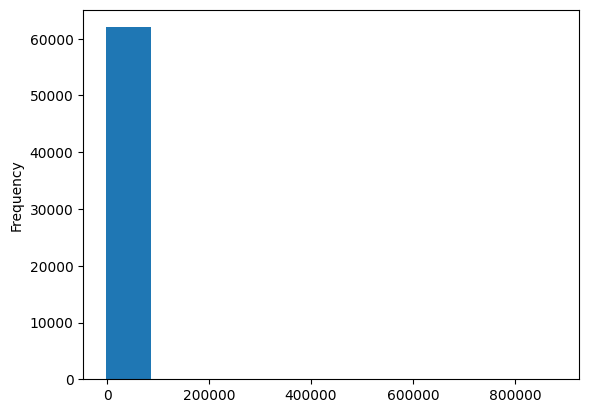

In [ ]:
# column 6: 'cert_max_gr_wt'
col_metrics(ntsb_1, 'cert_max_gr_wt')
print(ntsb_1['cert_max_gr_wt'].max(), ntsb_1['cert_max_gr_wt'].min())

def weight_bins(df, col):
    avg_wt = df[col].mean()    
    wt_cat = []
    for x in list(df[col]):
        if x <= 12500:
            x = 'small'
            wt_cat.append(x)
        elif x > 12500 and x < 41000:
            x = 'medium'
            wt_cat.append(x)
        elif x == 'nan':
            if avg_wt <=12500:
                x = 'small'
                wt_cat.append(x)
            elif avg_wt > 12500 and x < 41000:
                x = 'medium'
                wt_cat.append(x)
            else:
                x = 'large commuter'
                wt_cat.append(x)
        else:
            x = 'large commuter'
            wt_cat.append(x)
    df[col] = wt_cat
    return df[col]

In [ ]:
# use the bin function to assign categories to weight classes
ntsb_1['cert_max_gr_wt'] = weight_bins(ntsb_1, 'cert_max_gr_wt')

current df shape: (66839, 86)
Unique data:  [ 1.  2. nan  3.  4.  0.]
Value counts:  1.0    57350
2.0     7316
0.0      962
4.0       63
3.0       35
Name: num_eng, dtype: int64
Total nulls:  1113
Data type:  float64


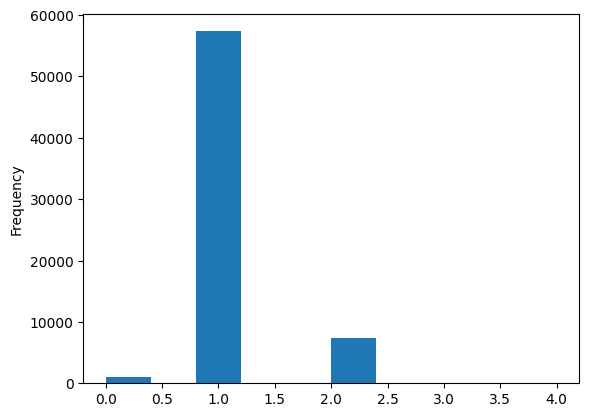

In [ ]:
# column 7: 'num_eng'
col_metrics(ntsb_1, 'num_eng')

# convert the float to int and then impute the nulls with the median
ntsb_1['num_eng'] = ntsb_1['num_eng']

In [ ]:
# change from float to int8
# fill na with 1
ntsb_1['num_eng'] = ntsb_1['num_eng'].fillna(1.0).astype('int8')


In [ ]:
# column 8: 'type_last_insp'
col_metrics(ntsb_1, 'type_last_insp')
ntsb_1['type_last_insp'] = ntsb_1['type_last_insp'].fillna('unk')

current df shape: (66839, 86)
Unique data:  ['100h' 'aaip' 'annl' 'unk' 'coaw' 'cond' nan]
Value counts:  annl    37642
unk     11158
100h    10334
cond     1928
aaip     1827
coaw     1665
Name: type_last_insp, dtype: int64
Total nulls:  2285
Data type:  object


current df shape: (66839, 86)
Unique data:  [10286.  14424.      nan ...  2341.8    53.2   967.5]
Value counts:  1.0        143
3000.0     120
2500.0     108
2000.0     104
4000.0      95
          ... 
9951.0       1
12810.0      1
9304.0       1
11110.0      1
967.5        1
Name: afm_hrs, Length: 14097, dtype: int64
Total nulls:  14564
Data type:  float64


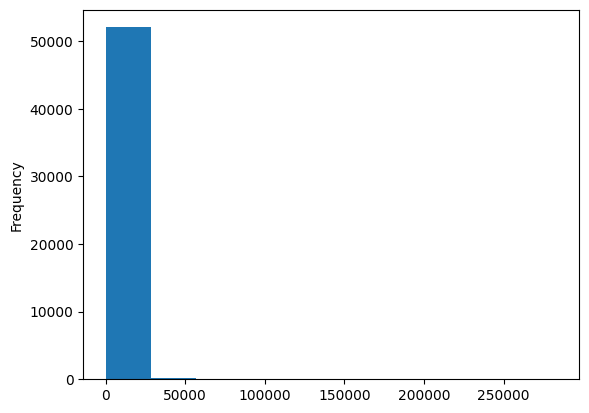

In [ ]:
# column 9: 'afm_hrs'
col_metrics(ntsb_1, 'afm_hrs')

In [ ]:
ntsb_1['afm_hrs'].describe()

count     52275.000000
mean       3659.618832
std        4737.689269
min           0.000000
25%        1246.000000
50%        2711.000000
75%        4598.055000
max      283334.000000
Name: afm_hrs, dtype: float64

In [ ]:
# count how many values are outliers
outlier = (1.5*(4752 - 1229)) + 4752
outliers = [x for x in ntsb_1['afm_hrs'] if x > outlier]
print(len(outliers))

2657


In [ ]:
# fill na with median
#median = ntsb_1['afm_hrs'].median()
#ntsb_1['afm_hrs'] = ntsb_1['afm_hrs'].fillna(median)
# drop the outliers
ntsb_1 = ntsb_1[ntsb_1['afm_hrs'] < outlier]


<Axes: ylabel='Frequency'>

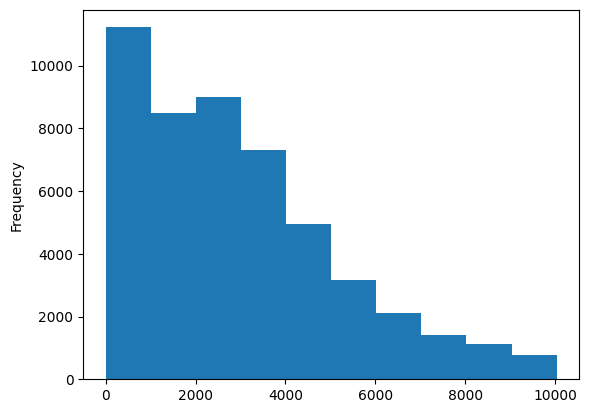

In [ ]:
ntsb_1['afm_hrs'].plot.hist(bins=10)

In [ ]:
ntsb_1.shape

(49618, 86)

In [ ]:
# round and change to int32
ntsb_1['afm_hrs'] = ntsb_1['afm_hrs'].round().astype('int16')

In [ ]:
# column 10: 'type_fly'
col_metrics(ntsb_1, 'type_fly')

current df shape: (49618, 86)
Unique data:  ['exec' 'pers' 'bus' 'inst' 'unk' 'pubu' 'aobv' 'posi' 'fery' 'owrk'
 'aapl' nan 'skyd' 'flts' 'asho' 'adrp' 'publ' 'gldt' 'bant' 'pubf' 'pubs'
 'exld' 'firf']
Value counts:  pers    30793
inst     6521
unk      2857
aapl     2857
bus      2634
posi      914
owrk      579
fery      474
aobv      394
exec      390
pubu      249
flts      224
asho       87
skyd       79
bant       48
gldt       22
pubs       12
publ        9
pubf        9
adrp        5
exld        5
firf        1
Name: type_fly, dtype: int64
Total nulls:  455
Data type:  object


In [ ]:
# change the null to unknown
ntsb_1['type_fly'] = ntsb_1['type_fly'].fillna('unk')

In [ ]:
# column 11: 'dprt_apt_id'
col_metrics(ntsb_1, 'dprt_apt_id')

# need to drop the 'k' from all 4 letter icao's
ntsb_1['dprt_apt_id'] = ntsb_1['dprt_apt_id'].astype('str').apply(lambda x: x[1:] if len(x) == 4 and x[0] == 'k' else x)

current df shape: (49618, 86)
Unique data:  ['gmu' 'ox8' nan ... 'skg' '62k' '38cl']
Value counts:  none    1059
pvt      285
mri      180
c        168
apa      136
        ... 
frn        1
120        1
mn84       1
317        1
38cl       1
Name: dprt_apt_id, Length: 7971, dtype: int64
Total nulls:  12101
Data type:  object


In [ ]:
# column 12: 'dprt_city'
col_metrics(ntsb_1, 'dprt_city')

current df shape: (49618, 86)
Unique data:  ['greeneville' nan 'detroit city' ... 'new philadelphia' 'kalaeloa'
 'ishpeming']
Value counts:  anchorage      387
houston        157
las vegas      153
albuquerque    150
fairbanks      147
              ... 
nimrod           1
mears            1
mcnabe           1
mahnomen         1
ishpeming        1
Name: dprt_city, Length: 7227, dtype: int64
Total nulls:  11865
Data type:  object


In [ ]:
# there are some city names that have commas and states after. remove those with commas
ntsb_1['dprt_city'] = ntsb_1['dprt_city'].str.split(',').str[0]


In [ ]:
# column 13: 'dprt_state'
col_metrics(ntsb_1, 'dprt_state')

current df shape: (49618, 86)
Unique data:  ['sc' nan 'mi' 'mn' 'il' 'ks' 'mo' 'oh' 'ne' 'az' 'nm' 'tx' 'la' 'ok' 'in'
 'ca' 'me' 'or' 'id' 'ak' 'ga' 'co' 'nh' 'nv' 'fl' 'ma' 'de' 'pa' 'ct'
 'ms' 'al' 'nc' 'wy' 'tn' 'nj' 'hi' 'ky' 'vi' 'wa' 'ut' 'ar' 'va' 'pr'
 'ny' 'wv' 'mt' 'sd' 'nd' 'po' 'vt' 'dc' 'ri' 'ia' 'cd' 'md' 'wi' 'of'
 'gm' 'ah' 'cn' 'bc' 'mp' 'yt' 'mx' 'un' 'bh' 'ad' 'nb' 'pq' 'cb' 'gu'
 'ha' 'io' 'kn' 'ja' 'bi' 'ao' 'dr' 'a']
Value counts:  ca    4121
fl    2699
tx    2601
ak    2387
az    1365
co    1217
wa    1201
ga    1023
mi     929
ny     917
il     914
oh     906
pa     897
nc     809
or     750
mo     741
wi     709
mn     692
id     656
va     640
nm     627
ar     619
ut     606
in     605
nv     600
tn     598
nj     593
al     562
ks     552
ok     550
la     510
sc     497
mt     447
ma     424
md     403
ia     390
ms     373
ne     345
ky     321
wy     317
me     271
nd     258
ct     244
sd     236
hi     199
nh     197
wv     188
vt     121
pr      95
gm

In [ ]:
# print out all the states that are incorrect
state_abbr = [
    "AL",  # Alabama
    "AK",  # Alaska
    "AZ",  # Arizona
    "AR",  # Arkansas
    "CA",  # California
    "CO",  # Colorado
    "CT",  # Connecticut
    "DE",  # Delaware
    "FL",  # Florida
    "GA",  # Georgia
    "HI",  # Hawaii
    "ID",  # Idaho
    "IL",  # Illinois
    "IN",  # Indiana
    "IA",  # Iowa
    "KS",  # Kansas
    "KY",  # Kentucky
    "LA",  # Louisiana
    "ME",  # Maine
    "MD",  # Maryland
    "MA",  # Massachusetts
    "MI",  # Michigan
    "MN",  # Minnesota
    "MS",  # Mississippi
    "MO",  # Missouri
    "MT",  # Montana
    "NE",  # Nebraska
    "NV",  # Nevada
    "NH",  # New Hampshire
    "NJ",  # New Jersey
    "NM",  # New Mexico
    "NY",  # New York
    "NC",  # North Carolina
    "ND",  # North Dakota
    "OH",  # Ohio
    "OK",  # Oklahoma
    "OR",  # Oregon
    "PA",  # Pennsylvania
    "RI",  # Rhode Island
    "SC",  # South Carolina
    "SD",  # South Dakota
    "TN",  # Tennessee
    "TX",  # Texas
    "UT",  # Utah
    "VT",  # Vermont
    "VA",  # Virginia
    "WA",  # Washington
    "WV",  # West Virginia
    "WI",  # Wisconsin
    "WY",  # Wyoming
    'gu', 
    'mp', 
    'pr',
    'tt',
    'vi'
]
print(len(state_abbr))
state_abbr = list(map(str.lower, state_abbr))

55


In [ ]:
# incorrect states
wrong_states = set()
state_sum = []
for x in ntsb_1['dprt_state']:
  if (x not in state_abbr) and (x is not np.nan):
      wrong_states.add(x)
      state_sum.append(x)
print(len(state_sum))
print(wrong_states)

# drop the rows with incorrect state values
ntsb_1 = ntsb_1[~ntsb_1['dprt_state'].isin(wrong_states)]

241
{'io', 'cn', 'of', 'yt', 'ja', 'a', 'pq', 'nb', 'cd', 'po', 'dr', 'ad', 'bh', 'kn', 'mx', 'dc', 'ah', 'bi', 'ha', 'ao', 'bc', 'gm', 'un', 'cb'}


In [ ]:
ntsb_1.shape

(49377, 86)

current df shape: (49377, 86)
Unique data:  [ 908. 1710. 1200. ... 2138.  156.  322.]
Value counts:  0.0       4147
1400.0     964
1500.0     899
1600.0     813
1300.0     801
          ... 
1760.0       1
2080.0       1
332.0        1
103.0        1
322.0        1
Name: dprt_time, Length: 1361, dtype: int64
Total nulls:  1923
Data type:  float64


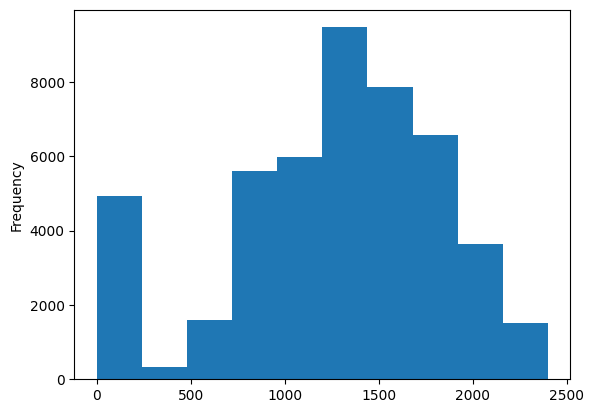

In [ ]:
# column 14: 'dprt_time'
col_metrics(ntsb_1, 'dprt_time')

In [ ]:
# change to string
ntsb_1['dprt_time'] = ntsb_1['dprt_time'].astype('str')

# remove all .o
ntsb_1['dprt_time'] = ntsb_1['dprt_time'].str.rstrip('.0')
times = []
for x in list(ntsb_1['dprt_time']):
    if len(x) == 1:
        x = '000' + x
        times.append(x)
    elif len(x) == 2:
        x = '00' + x
        times.append(x)
    elif len(x) == 3:
        x = '0' + x
        times.append(x)
    else:
        times.append(x)
ntsb_1['dprt_time'] = times
ntsb_1['dprt_time'].unique()


array(['0908', '0171', '0012', ..., '2138', '0156', '0322'], dtype=object)

In [ ]:
import numpy as np
# column 15: 'dest_same_local'
col_metrics(ntsb_1, 'dest_same_local')

# three different versions of yes so standatdizing it
ntsb_1['dest_same_local'] = ntsb_1['dest_same_local'].str.replace('same', 'y').str.replace('locl', 'y').str.replace('spec', 'y')

ntsb_1.loc[ntsb_1['dest_same_local'] == 'y', 'dest_apt_id'] = ntsb_1['dest_apt_id'].fillna(ntsb_1['dprt_apt_id'])  
 

current df shape: (49377, 86)
Unique data:  ['same' 'locl' nan 'spec' 'y']
Value counts:  locl    16663
same    10059
spec       19
y           1
Name: dest_same_local, dtype: int64
Total nulls:  22635
Data type:  object


In [ ]:
# column 16: 'dest_apt_id'
col_metrics(ntsb_1, 'dest_apt_id')

# need to drop the 'k' from all 4 letter icao's
ntsb_1['dest_apt_id'] = ntsb_1['dest_apt_id'].astype('str').apply(lambda x: x[1:] if len(x) == 4 and x[0] == 'k' else x)
ntsb_1.loc[ntsb_1['dest_apt_id'] == 'c', 'dest_apt_id'] = ntsb_1['dest_apt_id'].str.replace('c', 'pvt')

current df shape: (49377, 86)
Unique data:  ['3a1' 'ox8' 'nan' ... 'vvs' '62k' '38cl']
Value counts:  nan     7591
none    1087
pvt      301
c        206
mri      189
        ... 
x17        1
6m2        1
5s7        1
9ps2       1
38cl       1
Name: dest_apt_id, Length: 7989, dtype: int64
Total nulls:  3392
Data type:  object


In [ ]:
# col 17: 'dest_city'
col_metrics(ntsb_1, 'dest_city')

# there are some city names that have commas and states after. remove those with commas
ntsb_1['dest_city'] = ntsb_1['dest_city'].str.split(',').str[0]

current df shape: (49377, 86)
Unique data:  [nan 'oklahoma city' 'mt. vernon' ... 'langley' 'hicks/fort wort'
 'detroit/grosse ile']
Value counts:  anchorage             219
las vegas             124
houston               112
albuquerque           109
fairbanks             108
                     ... 
platform 86c            1
country squire          1
wilton                  1
st clair spring         1
detroit/grosse ile      1
Name: dest_city, Length: 6061, dtype: int64
Total nulls:  21854
Data type:  object


In [ ]:
# column 18: 'dest_state'
col_metrics(ntsb_1, 'dest_state')

# incorrect states
wrong_states = set()
state_sum = []
for x in ntsb_1['dest_state']:
  if (x not in state_abbr) and (x is not np.nan):
      wrong_states.add(x)
      state_sum.append(x)
print(len(state_sum))
print(wrong_states)

# drop the rows with incorrect state values
ntsb_1 = ntsb_1[~ntsb_1['dest_state'].isin(wrong_states)]

current df shape: (49377, 86)
Unique data:  ['al' nan 'ok' 'il' 'ks' 'co' 'ar' 'ne' 'tx' 'ca' 'fl' 'pa' 'sc' 'mi' 'az'
 'nv' 'ms' 'ct' 'ak' 'ia' 'ut' 'oh' 'tn' 'nc' 'mn' 'mo' 'nm' 'ga' 'or'
 'of' 'la' 'nj' 'ky' 'pr' 'wa' 'wy' 'nh' 'va' 'me' 'ma' 'ny' 'cg' 'p1'
 'id' 'mt' 'in' 'wi' 'md' 'wv' 'ck' 'hi' 'gm' '42' 'vt' 'de' 'nd' 'no'
 'ap' 'cd' 'mx' 'ri' 'bc' 'po' 'bm' 'dc' 'fm' 'fi' 'bu' 'go' 'vn' 'fd'
 'cn' 'ws' 'sd' 'vi' 'nb' 'un' 'dl' 'gc' '0' 'on' 'a' 'cb' '2' 'gu' 'ã¿ã¿'
 'it' 'd' '\x11' 'ao']
Value counts:  ca      2973
fl      1987
tx      1929
ak      1788
az       995
co       897
wa       880
ga       754
ny       674
nc       645
oh       638
pa       632
mi       630
il       619
or       581
mo       538
id       538
wi       514
mn       496
tn       471
ut       465
va       462
nv       457
nm       454
in       446
al       429
ok       424
nj       412
ar       401
ks       391
sc       386
mt       352
la       346
ma       331
ia       302
md       272
ky       246
ne 

current df shape: (49224, 86)
Unique data:  [560. 520. 540. 570. 580. 530. 550. 510. 590. 553. 574. 569. 565. 522.
 541. 551. 572. 564. 400. 568. 571.  nan 573. 531. 561. 581. 563. 582.
 552. 512. 513. 583. 521. 567. 566. 576. 523. 562. 575. 591. 511. 592.
 542. 514.]
Value counts:  570.0    14770
520.0     5135
580.0     3677
550.0     3398
540.0     2905
560.0     2842
510.0      955
572.0      897
574.0      815
522.0      723
530.0      641
571.0      612
590.0      243
564.0      239
576.0      220
521.0      209
565.0      183
541.0      175
553.0      164
581.0      159
573.0      104
523.0       90
531.0       76
513.0       66
575.0       63
552.0       54
561.0       54
512.0       47
567.0       45
551.0       43
563.0       41
569.0       33
582.0       29
591.0       29
583.0       25
562.0       19
592.0       15
566.0       14
568.0       12
514.0        5
511.0        1
400.0        1
542.0        1
Name: phase_flt_spec, dtype: int64
Total nulls:  9395
Data type:  float

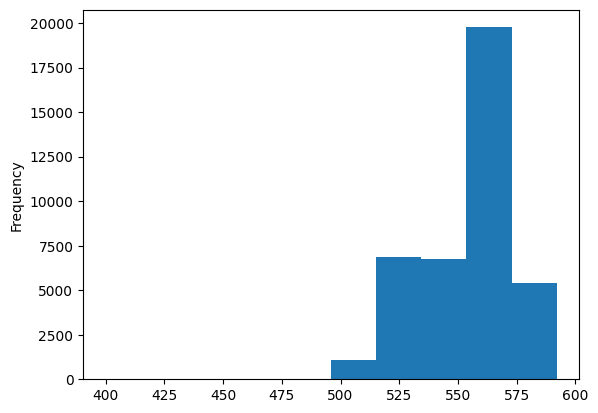

In [ ]:
# col 19: phase_flt_spec
col_metrics(ntsb_1, 'phase_flt_spec')

In [ ]:
# col 20: afm_hrs_since
col_metrics(ntsb_1, 'afm_hrs_since')

current df shape: (49224, 86)
Unique data:  [nan 'insp' 'acci' 'n' 'y']
Value counts:  acci    4919
n       4764
y       4518
insp    2347
Name: afm_hrs_since, dtype: int64
Total nulls:  32676
Data type:  object


In [ ]:
ntsb_1.columns

Index(['aircraft_ev_id', 'far_part', 'flight_plan_activated', 'damage',
       'acft_make', 'acft_model', 'cert_max_gr_wt', 'num_eng',
       'type_last_insp', 'date_last_insp', 'afm_hrs_last_insp', 'afm_hrs',
       'type_fly', 'dprt_apt_id', 'dprt_city', 'dprt_state', 'dprt_time',
       'dest_same_local', 'dest_apt_id', 'dest_city', 'dest_state',
       'phase_flt_spec', 'afm_hrs_since', 'rwy_num', 'rwy_len', 'rwy_width',
       'ifr_equipped_cert', 'eng_no', 'eng_type', 'eng_mfgr', 'hp_or_lbs',
       'carb_fuel_injection', 'eng_time_total', 'eng_time_last_insp',
       'ntsb_no', 'ev_type', 'ev_date', 'ev_dow', 'ev_time', 'ev_city',
       'ev_state', 'ev_year', 'ev_month', 'latitude', 'longitude', 'apt_name',
       'ev_nr_apt_id', 'ev_nr_apt_loc', 'apt_dist', 'apt_dir', 'apt_elev',
       'wx_src_iic', 'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id',
       'wx_obs_elev', 'wx_obs_dist', 'light_cond', 'sky_cond_nonceil',
       'sky_nonceil_ht', 'sky_ceil_ht', 'sky_cond_ceil', 'vis_

In [ ]:
ntsb_2 = ntsb_1

## Kathleen Section

In [ ]:
ntsb_2.columns

Index(['aircraft_ev_id', 'far_part', 'flight_plan_activated', 'damage',
       'acft_make', 'acft_model', 'cert_max_gr_wt', 'num_eng',
       'type_last_insp', 'date_last_insp', 'afm_hrs_last_insp', 'afm_hrs',
       'type_fly', 'dprt_apt_id', 'dprt_city', 'dprt_state', 'dprt_time',
       'dest_same_local', 'dest_apt_id', 'dest_city', 'dest_state',
       'phase_flt_spec', 'afm_hrs_since', 'rwy_num', 'rwy_len', 'rwy_width',
       'ifr_equipped_cert', 'eng_no', 'eng_type', 'eng_mfgr', 'hp_or_lbs',
       'carb_fuel_injection', 'eng_time_total', 'eng_time_last_insp',
       'ntsb_no', 'ev_type', 'ev_date', 'ev_dow', 'ev_time', 'ev_city',
       'ev_state', 'ev_year', 'ev_month', 'latitude', 'longitude', 'apt_name',
       'ev_nr_apt_id', 'ev_nr_apt_loc', 'apt_dist', 'apt_dir', 'apt_elev',
       'wx_src_iic', 'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id',
       'wx_obs_elev', 'wx_obs_dist', 'light_cond', 'sky_cond_nonceil',
       'sky_nonceil_ht', 'sky_ceil_ht', 'sky_cond_ceil', 'vis_

In [ ]:
#Walkthrough at https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_column_transformer.html
#preprocessing different for categorical vs numerical columns

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(ntsb_raw)
categorical_columns = categorical_columns_selector(ntsb_raw)

In [ ]:
#print(df.columns[2])
col_list = ntsb_2.columns[23:46]
print(col_list)

Index(['rwy_num', 'rwy_len', 'rwy_width', 'ifr_equipped_cert', 'eng_no',
       'eng_type', 'eng_mfgr', 'hp_or_lbs', 'carb_fuel_injection',
       'eng_time_total', 'eng_time_last_insp', 'ntsb_no', 'ev_type', 'ev_date',
       'ev_dow', 'ev_time', 'ev_city', 'ev_state', 'ev_year', 'ev_month',
       'latitude', 'longitude', 'apt_name'],
      dtype='object')


rwy_num
current df shape: (49224, 86)
Unique data:  ['20' '36' '18' '32' '27' '0' '35' '16' '26r' '28' '4r' '17' '34' '14'
 '22' '28l' '15l' '11r' '17l' '13' '24' '10l' '9' '30r' '15' '26' '21r'
 '3' '9r' '25' '1r' '5r' '7' '4' '12' '3r' '31' '5' '29' '29r' '19' '21'
 '8' '10' '23' '19l' '33' '30' '2' '28r' '1' '6' '26l' '14r' '17r' '19r'
 '25r' '11' '35r' '12r' '6l' '2l' '18r' '32r' '36l' '27r' '8r' '34r' '29l'
 '22l' '31r' '22g' '20r' '27l' '11l' '8l' '22r' '34l' '1l' '16l' '16r'
 '9l' '23r' '5l' '18l' '20l' '7r' '13l' '13r' '25l' '23l' '24l' '35l'
 '21l' '24r' '30l' '31l' '12l' '20c' '7l' '33l' '30c' '36c' '32l' '23c'
 '17c' '36r' '3l' nan '3c' '2r' '33r' '15r' '4l' '10r' '360' '14l' '190'
 '250' '01' '02' '067' '06' '09' '05' '2c' '6r' '0r' '00' '202' '61' '04'
 'nw' '03' '315' '07' '08' 'unk' '090' 'h1' '210' '160' '7u' '080' '27u'
 '180' '09r' 'e' '040' '055' '350' '070' '030' '010' '01l' '050' '270' 's'
 '09l' '5r7' '135' '9c' 'afo' 'gif' 'emm' '280' '110' '290' '240' '320'
 '02

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


ntsb_no
current df shape: (49224, 86)
Unique data:  ['atl99fa044' 'atl99fa046' 'atl99la137' ... 'cen16ca277' 'cen16la281'
 'wpr16fa148']
Value counts:  atl99fa044    1
den82da083    1
ftw82da189    1
ftw82da190    1
ftw82da191    1
             ..
ftw89dqg04    1
ftw89drd06    1
ftw89drd07    1
ftw89drd08    1
wpr16fa148    1
Name: ntsb_no, Length: 49224, dtype: int64
Total nulls:  0
Data type:  object
ev_type
current df shape: (49224, 86)
Unique data:  ['acc' 'inc']
Value counts:  acc    48592
inc      632
Name: ev_type, dtype: int64
Total nulls:  0
Data type:  object
ev_date
current df shape: (49224, 86)
Unique data:  ['1/14/1999' '1/30/1999' '1/21/1999' ... '04-aug-16' '22-jul-16'
 '23-jul-16']
Value counts:  5/16/1982     24
6/5/1983      22
10/3/1982     20
7/28/1983     20
6/19/1982     20
              ..
3/11/1986      1
2/5/1986       1
2/6/1986       1
12/28/1987     1
23-jul-16      1
Name: ev_date, Length: 12153, dtype: int64
Total nulls:  0
Data type:  object
ev_dow
curren

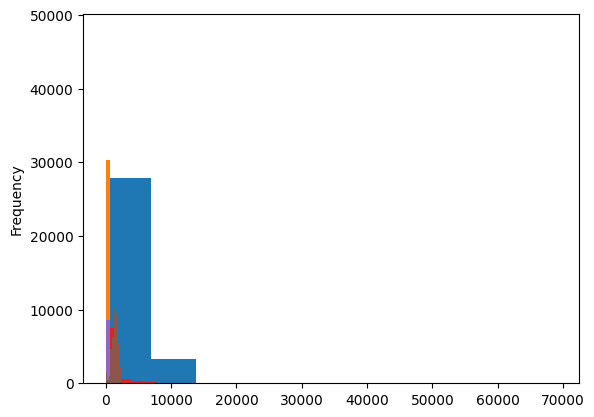

In [ ]:
# Listing metrics for all assigned columns 

for col in col_list:
  print(ntsb_2[col].name)
  col_metrics(ntsb_2, col) 

In [ ]:
# Removing spaces in runway number column. Not sure what else to do with this column, some runways might be more risky for particular airports, so I think this is valuable to keep.
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '0', '36', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '3 r', '3r', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '10r/', '10r', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '18r/', '18r', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '18 /', '18', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'unk', np.nan, inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'none', np.nan, inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '055', '55', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '000', '36', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '060' , '60', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '035', '35', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '07/2', '07', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '03/2', '03', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '08/2', '08', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '022', '22', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '9 r', '09r', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '2/8', '02', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '09/2', '09', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '04/2', '04', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '05/2', '05', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '12/3', '12', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '14/3', '14', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '15/3', '15', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '10/2', '10', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '11/2', '11', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '16/3', '16', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '18/3', '18', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '17/3', '17', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '02/2', '02', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '5/23', '05', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '9/27', '09', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '7/25', '07', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '1/19', '01', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'n', '36', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 's', '18', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'w', '27', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'e', '09', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'e/w', '27', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'n/s', '18', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'nw', '31', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'emm', np.nan, inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'afo', np.nan, inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'gif', np.nan, inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'pvt', 'private', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'se', '13', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'vgt', np.nan, inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'west', '27', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'ne', '04', inplace=True) 
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'vgt', np.nan, inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'sw', '24', inplace=True)
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == 'h2', np.nan, inplace=True)

In [ ]:
## update runway numbers
ntsb_2['rwy_num'].mask(ntsb_2['rwy_num'] == '', np.nan, inplace=True)
ntsb_2['rwy_num'].unique()

array(['20', '36', '18', '32', '27', '35', '16', '26r', '28', '4r', '17',
       '34', '14', '22', '28l', '15l', '11r', '17l', '13', '24', '10l',
       '9', '30r', '15', '26', '21r', '3', '9r', '25', '1r', '5r', '7',
       '4', '12', '3r', '31', '5', '29', '29r', '19', '21', '8', '10',
       '23', '19l', '33', '30', '2', '28r', '1', '6', '26l', '14r', '17r',
       '19r', '25r', '11', '35r', '12r', '6l', '2l', '18r', '32r', '36l',
       '27r', '8r', '34r', '29l', '22l', '31r', '22g', '20r', '27l',
       '11l', '8l', '22r', '34l', '1l', '16l', '16r', '9l', '23r', '5l',
       '18l', '20l', '7r', '13l', '13r', '25l', '23l', '24l', '35l',
       '21l', '24r', '30l', '31l', '12l', '20c', '7l', '33l', '30c',
       '36c', '32l', '23c', '17c', '36r', '3l', nan, '3c', '2r', '33r',
       '15r', '4l', '10r', '360', '14l', '190', '250', '01', '02', '067',
       '06', '09', '05', '2c', '6r', '0r', '00', '202', '61', '04', '03',
       '315', '07', '08', '090', 'h1', '210', '160', '7u', '08

current df shape: (49224, 86)
Unique data:  [5500. 3800. 1900. ... 3354. 2141. 4651.]
Value counts:  0.0        5033
5000.0     1088
3000.0      972
4000.0      828
2500.0      533
           ... 
3906.0        1
12819.0       1
2094.0        1
2991.0        1
4651.0        1
Name: rwy_len, Length: 2990, dtype: int64
Total nulls:  18084
Data type:  float64


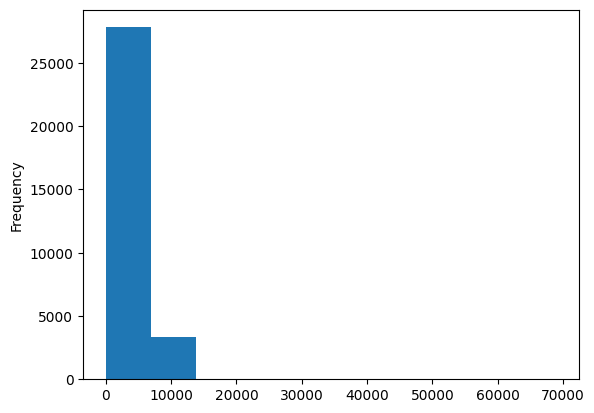

In [ ]:
col_metrics(ntsb_2, col='rwy_len')

<Axes: ylabel='Density'>

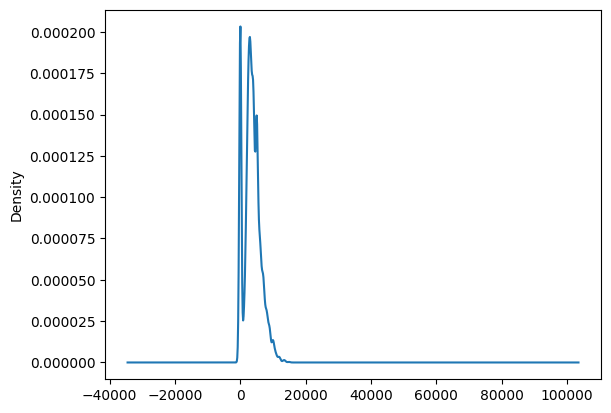

In [ ]:
ntsb_2['rwy_len'].plot(kind='kde')

In [ ]:
# binning values in 'rwy_len' column

bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]
labels =[1,2,3,4,5,6,7,8,9,10,11,12]
ntsb_2['rwy_len'] = pd.cut(ntsb_2['rwy_len'], bins,labels=labels)
col_metrics(ntsb_2, col='rwy_len')

current df shape: (49224, 86)
Unique data:  [6, 4, 2, 7, NaN, ..., 9, 8, 11, 12, 1]
Length: 13
Categories (12, int64): [1 < 2 < 3 < 4 ... 9 < 10 < 11 < 12]
Value counts:  3     5843
4     5565
5     4270
6     3187
2     2077
7     1851
8     1236
9      839
10     443
1      331
11     257
12     122
Name: rwy_len, dtype: int64
Total nulls:  23203
Data type:  category


In [ ]:
# count how many values are outliers
outlier = (1.5*(4752 - 1229)) + 4752
outliers = [x for x in ntsb_2['afm_hrs'] if x > outlier]
print(len(outliers))

0


current df shape: (49224, 86)
Unique data:  [1.000e+02 3.600e+01 7.500e+01 1.500e+02 1.200e+02       nan 5.000e+01
 6.000e+01 3.000e+02 8.000e+01 4.000e+01 1.530e+02 7.200e+01 9.000e+01
 3.000e+01 4.500e+01 3.500e+01 1.590e+02 7.000e+01 7.300e+01 4.400e+01
 6.500e+01 4.700e+01 6.600e+01 2.000e+02 1.300e+02 2.500e+01 4.800e+01
 2.600e+01 5.500e+01 6.800e+01 1.600e+02 3.900e+01 4.300e+01 3.200e+01
 2.400e+01 1.700e+02 2.500e+02 2.200e+01 4.200e+01 1.250e+02 5.000e+02
 1.500e+01 2.000e+01 5.900e+01 7.700e+01 2.800e+01 1.800e+02 2.090e+02
 7.400e+01 3.800e+01 2.900e+02 1.150e+02 8.500e+01 3.700e+01 1.400e+02
 1.100e+02 0.000e+00 1.900e+02 1.750e+02 3.400e+01 1.010e+02 7.800e+01
 6.200e+01 3.100e+01 1.350e+02 6.100e+01 4.900e+01 1.880e+02 1.800e+01
 1.000e+01 2.150e+02 1.450e+02 9.500e+01 1.140e+02 2.400e+02 4.600e+01
 1.130e+02 1.200e+01 3.300e+01 1.480e+02 2.300e+02 4.000e+02 9.600e+01
 2.800e+02 2.020e+02 8.400e+01 2.600e+02 2.700e+01 1.040e+02 1.050e+02
 1.160e+02 9.400e+01 5.600e+01 2.

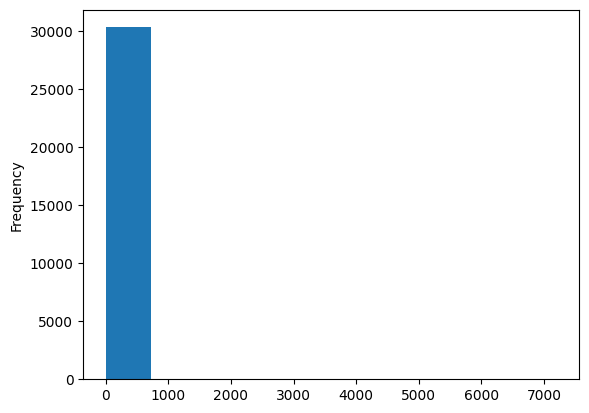

In [ ]:
col_metrics(ntsb_2, col='rwy_width')

In [ ]:
ntsb_2['rwy_width'].round(0)

3         100.0
5          36.0
6          75.0
7         150.0
8         120.0
          ...  
112732      NaN
112744     50.0
112761      NaN
112775      NaN
112802      NaN
Name: rwy_width, Length: 49224, dtype: float64

In [ ]:
ntsb_2['rwy_width'].max()

7201.0

<Axes: ylabel='Density'>

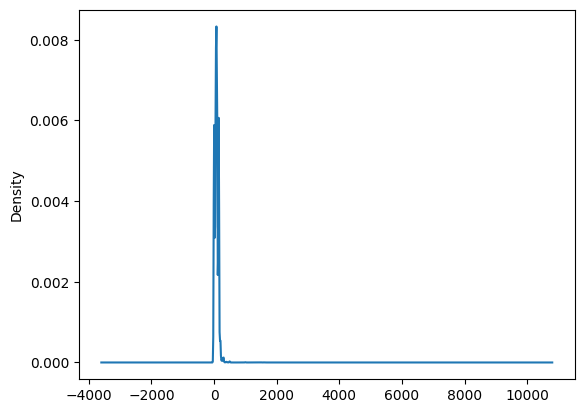

In [ ]:
ntsb_2['rwy_width'].plot(kind='kde')

In [ ]:
# binning values in 'rwy_width' column... same question as above

bins2 = [0,10,20,30,40,50,60,70,80,90,100,200]
labels2 = [1,2,3,4,5,6,7,8,9,10,11,]

#bins2 = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]
#labels2 =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ntsb_2['rwy_width'] = pd.cut(ntsb_2['rwy_width'], bins2, labels=labels2)
col_metrics(ntsb_2, col='rwy_width')

current df shape: (49224, 86)
Unique data:  [10, 4, 8, 11, NaN, ..., 9, 3, 7, 2, 1]
Length: 12
Categories (11, int64): [1 < 2 < 3 < 4 ... 8 < 9 < 10 < 11]
Value counts:  11    6618
8     5356
10    5158
5     2869
6     2000
4     1063
3      737
7      514
2      227
9      153
1       19
Name: rwy_width, dtype: int64
Total nulls:  24510
Data type:  category


In [ ]:
col_metrics(ntsb_2, col='eng_type')

current df shape: (49224, 86)
Unique data:  ['tp' 'rec' 'tj' 'ts' 'unk' 'tf' nan 'elec' 'none' 'hr']
Value counts:  rec     43832
ts       1678
tp       1489
unk       836
tf        306
tj        181
none        5
elec        3
hr          1
Name: eng_type, dtype: int64
Total nulls:  893
Data type:  object


In [ ]:
# Changing datatype for eng_type column to category
ntsb_2['eng_type'].astype('category')

3          tp
5         rec
6         rec
7         rec
8         rec
         ... 
112732    rec
112744    rec
112761    rec
112775    rec
112802     tp
Name: eng_type, Length: 49224, dtype: category
Categories (9, object): ['elec', 'hr', 'none', 'rec', ..., 'tj', 'tp', 'ts', 'unk']

In [ ]:
#replacing none and unk values from eng_type with nan
ntsb_2['eng_type'].mask(ntsb_2['eng_type'] == 'none', np.nan, inplace=True)
ntsb_2['eng_type'].mask(ntsb_2['eng_type'] == 'unk', np.nan, inplace=True)

In [ ]:
ntsb_2['eng_mfgr'].unique()

array(['p&w', 'lycoming', 'continental', 'garrett', 'jacobs', 'allison',
       'rotax', nan, 'turbomeca', 'walter', 'franklin', 'rolls-royce',
       'pzl-kalisz', 'hirth', 'volkswagen', 'rotorway', 'subaru',
       'unknown', 'revmaster', 'p&w canada', 'bombardier', 'gansheimer',
       'ge', 'wright', 'grob', 'china', 'mazda', 'fairchild',
       'allied signal', 'kinner', 'curtis wright', 'great plains', 'hapi',
       'cameron', 'pezetel', 'onan', 'hirtmotoren', 'milwaukee prt',
       'zenoah', 'mosler', 'jaguar', 'packard', 'vendeneyev', 'chevrolet',
       'kawasaki', 'mcculloch', 'cuyuna', 'kfm', 'pzl mielec', 'warner',
       'lambert', 'nsi', 'amw', 'voronezh', 'ford', 'jpx', 'bmw r-r',
       'wsk', 'shvetsov', 'honda', 'housia', 'microal', 'limbach',
       'wsk pzl kalis', 'williams intl', 'bellanca', 'spencer', 'klimov',
       'konig', 'orenda', 'emsa', 'detr. diesel', 'lom', 'bristol',
       'airesearch', 'teledyne cont', 'jabiru', 'yamaha', 'thruct in',
       'suzuk

In [ ]:
ntsb_2.drop(columns=['hp_or_lbs', 'ntsb_no'])

,aircraft_ev_id,far_part,flight_plan_activated,damage,acft_make,acft_model,cert_max_gr_wt,num_eng,type_last_insp,date_last_insp,...,inj_tot_t,wx_cond_basic,Cause_Factor,crew_no,crew_category,crew_age,crew_sex,med_certf,pilot_flying,crew_inj_level
3,20001204x00006,091,NaN,dest,beech,other_model,medium,2,aaip,1/14/1999,...,2.0,imc,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
5,20001204x00008,091,NaN,dest,aero commander,other_model,small,2,annl,10/1/1998,...,4.0,vmc,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
6,20001204x00015,091,NaN,subs,gettis h. hudson,other_model,small,1,annl,8/1/1998,...,NaN,vmc,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
7,20001204x00016,091,NaN,dest,beech,other_model,small,2,annl,6/22/1998,...,3.0,imc,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
8,20001204x00017,091,NaN,dest,beech,other_model,small,2,annl,11/4/1998,...,3.0,imc,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112732,20160721x52728,091,n,subs,boeing,other_model,small,1,annl,10-dec-15,...,2.0,vmc,NaN,2.0,pass,NaN,f,NaN,True,minr
112744,20160721x55442,091,n,subs,rockwell international,other_model,small,1,annl,25-may-16,...,3.0,vmc,c,3.0,pass,NaN,m,NaN,True,none
112761,20160721x90029,137,n,subs,grumman acft eng cor-schweizer,other_model,small,1,100h,23-jun-16,...,1.0,vmc,c,1.0,plt,29.0,m,cl2,True,none
112775,20160722x63338,091,y,dest,vans,other_model,large commuter,1,cond,16-jun-16,...,2.0,vmc,c,2.0,pass,84.0,f,NaN,True,fatl


In [ ]:
#Cleaning names of engine manufacturers.

ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == '1/2 volkswagen', 'volkswagen', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'aero engines (vw)', 'volkswagen', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == '4 burner type engines', '', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ã\x80/o', '', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'â\x82¬', '', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aero engines (vw)', 'aero engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aero sport', 'aero sport power', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'aero sport power (lycoming)', 'lycoming', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aero sport power (lycoming)', 'aero sport power', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aero sport power ltd', 'aero sport power', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aero sport power ltd.', 'aero sport power', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aero-vee', 'aero vee', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aeromotors s.a.', 'aero motors', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aerosport', 'aero sport power', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'aerosport / lycoming', 'lycoming', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aerosport / lycoming', 'aero sport power', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aerosport power', 'aero sport power', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aerovee', 'aero vee', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ai', 'airesearch', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aireasearch', 'airesearch', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'aireaserch/garrett', 'garrett', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'aireaserch/garrett', 'airesearch', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'airresearch', 'airesearch', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'airresearch/honeywell', 'honeywell aerospace', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'airresearch/honeywell', 'airesearch', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allied', 'allied signal', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'allied/honeyw', 'honeywell aerospace', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allied/honeyw', 'allied signal', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'alliedsignal', 'allied signal', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'allison (r/r)', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison (r/r)', 'allison', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'allison / rolls royce', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison / rolls royce', 'allison', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison 250-c20b', 'allison', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison c', 'allison', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison engine', 'allison', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'allison rolls royce', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison rolls royce', 'allison', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'allison/rolls royce', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison/rolls royce', 'allison', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'allison/rolls-royce', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison/rolls-royce', 'allison', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'allison/rr', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'allison/rr', 'allison', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'alllison', 'allison', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'ama (vw)', 'volkswagen', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ama/expr', 'ama', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'ama/expr lycoming)', 'lycoming', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ama/expr lycoming', 'ama', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'arriel', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ariel', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'avco', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'avco lycoming', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'barrett precision engines', 'barret precision engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'barrett performance engine', 'barret precision engines', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'bmw r-r', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bmw r-r', 'bmw', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'bmw rolls-royce', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bmw rolls-royce', 'bmw', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bombardier', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bombardier rotax', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bombardier rotex', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bombardier-rotax', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bombardier', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bombardier/rotax', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'bristsidviper', 'Armstrong Siddeley', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'brp rotax gmbh7 co. kg', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cfm', 'cfm international', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cfm intl', 'cfm international', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cfm intl.', 'cfm international', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'chapallal', 'elroy air chaparral', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'chevrolet corvair', 'chevrolet', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'chevrolot', 'chevrolet', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'chevy', 'chevrolet', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'chevy geo metro', 'chevrolet', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'club crafters inc.', 'club crafters, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'compact ra', 'compact radial engines, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'compact radial engines', 'compact radial engines, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'compact radial engines inc.', 'compact radial engines, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'continental motor\'s inc', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'conintental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'conitnental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cont motor', 'continental motors, inc.', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'cont motor p. ponk', 'p.ponk', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cont motor p. ponk', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cont motor/perf eng', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cont-motor', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cont. motor', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'contenental teledyne', 'teledyne turbine engines', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental teledyne', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenintal', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contenental', 'continental motors, inc.', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'continental teledyne motors', 'teledyne turbine engines', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'continental teledyne motors', 'continental motors, inc.', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'continental/p. ponk', 'p.ponk', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'continental/p. ponk', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'continential', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'continential motors', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'continetal motors', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'continetnal', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contintental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contl', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'contnental', 'continental motors, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'corvair', 'chevrolet', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'covington', 'covington aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cub crafter', 'club crafters, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cub crafters', 'club crafters, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cubcrafters', 'club crafters, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'curtis - wright', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'curtis wright', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'curtis-wright', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'curtiss', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'curtiss wright', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'curtiswright', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'custom', np.nan, inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'cuyana', 'cuyuna', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'dehav eng', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'dehavilland', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'detr. diesel', 'detroit diesel', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'diamond', 'diamond aircraft', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'diemech', 'diemech turbines', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'diemech (walter)', 'walter aircraft engines', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'diemech (walter)', 'diemech turbines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'diemech turbine', 'diemech turbines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'diemech turbines inc', 'diemech turbines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'eci', 'engine components, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'eci titan', 'engine components, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'eci/titan', 'engine components, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'eggenfellner', 'eggenfellner aircraft, inc.', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'eggenfellner subaru', 'subaru', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'eggenfellner subaru', 'eggenfellner aircraft, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'elizalde, s.a.', 'elizalde', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'engine components internationa', 'engine components international', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'engineair', 'engineair power systems', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'exp', 'experimental', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'experimental tcm', 'experimental', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'falconer', 'ryan falconer racing engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'falconer eng.', 'ryan falconer racing engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'frankin', 'franklin aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'franklin', 'franklin aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'franklyn', 'franklin aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'frnklin', 'franklin aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'g e', 'general electric', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garett', 'garret', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'garret airesearch', 'airesearch', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garret airesearch', 'garret', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'garret/honeywell', 'honeywell aerospace', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garret/honeywell', 'garret', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garrett', 'garret', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'garrett airesearch', 'airesearch', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garrett airesearch', 'garret', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'garrett research', 'airesearch', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garrett research', 'garret', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'garrett-airesearch', 'airesearch', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garrett-airesearch', 'garret', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'garrett/airesearch', 'airesearch', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garrett/airesearch', 'garret', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'garrett/honeywell', 'honeywell aerospace', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'garrett/honeywell', 'garret', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ge', 'general electric', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ge aviation czech', 'general electric', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gen.electric', 'general electric', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'general elect', 'general electric', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'general electrics', 'general electric', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'geo/metro', 'geo metro', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gipsy major', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gm', 'general motors', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gm corvair', 'general motors', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'great plains', 'great plains aircraft supply company', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'great plains/volkswagen', 'volkswagen', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'great plains/volkswagen', 'great plains aircraft supply company', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'great plans aircraft', 'great plains aircraft supply company', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'greatplains', 'great plains aircraft supply company', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'grob', 'grob aircraft', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gypsey major', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gypsy major', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gipsy major', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gypsy minor', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'gypsy moth', 'de havilland', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hacker a200', 'hacker', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'hapi vw', 'volkswagen', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hapi vw', 'hapi', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'heath avn', 'heath airplane company', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hirsh', 'hirth engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hirth', 'hirth engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hirthmotoren', 'hirth engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hirtmotoren', 'hirth engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hks', 'hks aviation engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hks aviation', 'hks aviation engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'honeywell', 'honeywell aerospace', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'honeywell - garrett', 'garret', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'honeywell - garrett', 'honeywell aerospace', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'honeywell / airesearch', 'airesearch', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'honeywell / airesearch', 'honeywell aerospace', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'honeywell garrett', 'garret', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'honeywell garrett', 'honeywell aerospace', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'honeywell/garrett', 'garret', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'honeywell/garrett', 'honeywell aerospace', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'honeywell/lyc', 'lycoming', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'honeywell/lyc', 'honeywell aerospace', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'housia', 'housai', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'hummel', 'hummel engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'huosai', 'housai', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'inntec', 'innovator technologies', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'int harvester', 'solar aircraft', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ivchenco', 'ivchenko okb', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ivchenko', 'ivchenko okb', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'jabaru', 'jabiru aircraft', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'jabiru', 'jabiru aircraft', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'jpx', 'jpx aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'jpx aircraft engines', 'jpx aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'jpx-pul', 'jpx aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'kfm', 'italian american motor engineering', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'kinner', 'kinner airplane & motor corporation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'kinner co', 'kinner airplane & motor corporation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'le rhone', 'société des moteurs le rhôn', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lerhone', 'société des moteurs le rhôn', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'limbach', 'limbach', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'limbeck', 'limbach', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lom', 'lom praha', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ly-con', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lyc', 'lycoming', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'lyco/wright', 'curtiss-wright', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lyco/wright', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycoiming', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycom', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycomimg', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycomin', 'lycoming', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'lycoming (curtis-wright)', 'curtiss-wright', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycoming (curtis-wright)', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycoming (modified)', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycoming engines', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycoming o-360-a1a', 'lycoming', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'lycoming-bmw', 'bmw', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycoming-bmw', 'lycoming', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'lycoming/honeywell', 'honeywell aerospace', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycoming/honeywell', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycomming', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycomong', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'lycon', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mattittuck', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mattituck', 'teledyne turbine engines', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'mazda/atkins', 'atkins', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mazda/atkins', 'mazda', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mcculloch', 'mcculloch aircraft corporation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mccullock', 'mcculloch aircraft corporation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mccullough', 'mcculloch aircraft corporation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mid-west', 'jet midwest, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mid-west engines', 'jet midwest, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'morris motors', 'morris engines limited', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'motori zanzoterra', 'zanzottera technologies', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'mz', 'zanzottera technologies', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'national flight service', 'national flight services, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'national flight service', 'national flight services, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'national flight services inc', 'national flight services, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'none', np.nan, inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'northrop corp', 'northrop corporation ', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'nsi', 'nsi propulsion systems, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'nsi aero', 'nsi propulsion systems, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'o-360-a4k', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'o-470l', 'teledyne continental motors', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p & w', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p & w', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p & w canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p. ponk', 'p.ponk', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p/w canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p&w', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p&w canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'p&wc', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'packard', 'packard motors', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'packard r.r.', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'packard r.r.', 'packard motors', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'packard rolls royce', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'packard rolls royce', 'packard motors', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'patt &whitney canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pbs', 'pbs aerospace', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'penn yann aero', 'penn yan aero', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'penn-yan', 'penn yan aero', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pezatel', 'pezetel', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'pkrd-roll', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pkrd-roll', 'packard motors', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'pkrd-roll royce', 'rolls-royce', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pkrd-roll royce', 'pkrd-roll royce', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'polaris', 'walter aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'prat and whitney aircraft', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt & whitney - canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt & whitney aircraft of ca', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt & whitney of canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt & whitney-canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'prat and whitney aircraft', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt & witney', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt &whitney canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt and whitnety canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt and whitney', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt and whitney - canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt and whitney canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt and whitney of canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt whitney', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt whitney canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt-whitney', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt/whitney', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt& whitney', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt&whitney', 'pratt & whitney', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pratt&whitney-canada', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pw&c', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pwc', 'pratt & whitney canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pzl mielec', 'pzl', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pzl wsk', 'pzl', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pzl-kalisz', 'pzl', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pzl-okecie', 'pzl', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pzl-rzeszow', 'pzl', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'pzl-warszana', 'pzl', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ram', 'ram racing engines, ltd.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ram racing engines ltd', 'ram racing engines, ltd.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rev.', 'revmaster aviation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'revmaster', 'revmaster aviation', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rogers-lycoming', 'lycoming', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rogers-lycoming', 'rogers', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls royce', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls royce (allison)', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls royce (allison)', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls royce / allison', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls royce / allison', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls royce allison', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls royce allison', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls royce-allison', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls royce-allison', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls royce/ allison', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls royce/ allison', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls royce/allison', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls royce/allison', 'rolls-royce', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls-royc', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls-royce allison', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls-royce allison', 'rolls-royce', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls-royce corporation', 'rolls-royce', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls-royce deutschland', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls-royce turbomeca', 'safran helicopter engines', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls-royce turbomeca', 'rolls-royce', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'rolls-royce(allison)', 'allison', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rolls-royce(allison)', 'rolls-royce', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotax', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotax gmbh', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotax gmbh & co.', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotec', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotex', 'brp-rotax', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotortway', 'rotorway international, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotorway', 'rotorway international, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rotorway international', 'rotorway international, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'rw', 'rotorway international, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ryan', 'ryan falconer racing engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'safran (formerly turbomeca)', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'shvetsoc', 'shvetsov', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'solair', 'solair group, llc', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'subaru - stratus built', 'stratus 2000, inc.', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'subaru - stratus built', 'subaru', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'subaru/eggenfellner', 'eggenfellner aircraft, llc', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'subaru/eggenfellner', 'subaru', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'subuaru', 'subaru', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'suburu', 'subaru', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'superior', 'superior air parts, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'superior air parts', 'superior air parts, inc.', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledine continental motors', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledye continental motors', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyn continental', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyn continental motors', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne cont', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne continental', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne continental mortors', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne continental motor', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne continental motors', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne matituck', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne mattituck', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne-continental', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne-continental motors', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'teledyne/cont', 'teledyne turbine engines', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'textron lyc.', 'lycoming', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'textron lyc.', 'textron aviation', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'textron lycoming', 'lycoming', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'textron lycoming', 'lycoming', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'titan', 'continental aerospace technologies', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'tmx', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'tomanski', 'tumanski', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'toyota/auto', 'toyota', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'tubomecca', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'turbo meca', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'tubomecca', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'turbomeca', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'turbomeca usa', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'turbomecca', 'safran helicopter engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'two stroke international', '2si', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'tyledyne continental motors', 'teledyne turbine engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'u/a of canada', 'u/a canada', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ul', 'ulpower aero engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'ul power', 'ulpower aero engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'unk', np.nan, inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'unk/nr', np.nan, inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'unkn', np.nan, inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'unknown', np.nan, inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'v.w.', 'volkswagen', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vedeheyev', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vedeneev', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vedenev', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vedeneyev', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vedeneyez', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vedenyev', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vellie', 'velie', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vendeneyev', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vendenyev', 'vedeneyev', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'viking', 'viking aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'viking aircraft engines', 'viking aircraft engines', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'viking conversion of honda', 'honda', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'viking conversion of honda', 'viking aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'volkswagan', 'volkswagen', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'volkswagoen', 'volkswagen', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'volkswagon', 'volkswagen', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'volkswagon/great plains', 'great plains aircraft supply company', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'volkswagon/great plains', 'volkswagen', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vw', 'volkswagen', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'vw- hummel', 'hummel', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'vw- hummel', 'volkswagen', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'walter', 'walter aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'walter engine incorporated', 'walter aircraft engines', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'walter/ge', 'general electric', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'walter/ge', 'walter aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'walther', 'walter aircraft engines', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'warner', 'warner aircraft corporation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'warner aircraft engines', 'warner aircraft corporation', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'warner super scarab', 'warner aircraft corporation', inplace=True)
ntsb_2['secondary_eng_mfgr'] = np.where(ntsb_2['eng_mfgr'] == 'watson "vw"', 'volkswagen', '')
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'watson "vw"', 'watson', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'williams', 'williams international', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'williams', 'williams international company', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'williams', 'williams intl', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wright', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wright cyclone', 'curtiss-wright', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wsk', 'pzl wsk-kalisz', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wsk pzl kalis', 'pzl wsk-kalisz', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wsk pzl kalisz', 'pzl wsk-kalisz', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wsk-pzl', 'pzl wsk-kalisz', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wsk-pzl-k', 'pzl wsk-kalisz', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'wynn corvair', 'wynn', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'xtreem 360', 'xtremeair gmbh', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'zanzarterra', 'zanzottera technologies', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'zanzottera', 'zanzottera technologies', inplace=True)
ntsb_2['eng_mfgr'].mask(ntsb_2['eng_mfgr'] == 'zeonoa', 'zenoah', inplace=True)

In [ ]:
ntsb_2['carb_fuel_injection'].astype('category')

3          NaN
5         carb
6         carb
7         finj
8         finj
          ... 
112732    carb
112744    finj
112761    carb
112775    finj
112802     NaN
Name: carb_fuel_injection, Length: 49224, dtype: category
Categories (2, object): ['carb', 'finj']

In [ ]:
ntsb_2['carb_fuel_injection'].astype('category')

3          NaN
5         carb
6         carb
7         finj
8         finj
          ... 
112732    carb
112744    finj
112761    carb
112775    finj
112802     NaN
Name: carb_fuel_injection, Length: 49224, dtype: category
Categories (2, object): ['carb', 'finj']

In [ ]:
ntsb_2['ev_type'].astype('category')

3         acc
5         acc
6         acc
7         acc
8         acc
         ... 
112732    acc
112744    acc
112761    acc
112775    acc
112802    acc
Name: ev_type, Length: 49224, dtype: category
Categories (2, object): ['acc', 'inc']

In [ ]:
ntsb_2['ev_city'].astype('string')

3               cullman
5             belleview
6         pleasant view
7              pellston
8               elkhart
              ...      
112732        st. james
112744           munday
112761           topeka
112775      springfield
112802           zamora
Name: ev_city, Length: 49224, dtype: string

In [ ]:
ntsb_2['ev_state'].astype('string')

3         al
5         fl
6         tn
7         mi
8         in
          ..
112732    mo
112744    tx
112761    ks
112775    oh
112802    ca
Name: ev_state, Length: 49224, dtype: string

In [ ]:
ntsb_2['eng_time_total'].unique()

array([  nan,    0., 2830., ...,  179.,   68.,  968.])

In [ ]:
ntsb_2['eng_time_total'].unique()
ntsb_2['eng_time_total'].max()

bins3 = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000]
labels3 = [1,2,3,4,5,6,7,8,9,10]

ntsb_2['eng_time_total'] = pd.cut(ntsb_2['eng_time_total'], bins3, labels=labels3)
col_metrics(ntsb_2, col='eng_time_total')

current df shape: (49224, 87)
Unique data:  [NaN, 1, 2, 3, 4]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
Value counts:  1     1991
2      242
3       31
4        3
5        0
6        0
7        0
8        0
9        0
10       0
Name: eng_time_total, dtype: int64
Total nulls:  46957
Data type:  category


In [ ]:
ntsb_2['eng_time_last_insp'].round()
ntsb_2['eng_time_last_insp'].max()
bins4 = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000, 11000, 12000, 13000]
labels4 = [1,2,3,4,5,6,7,8,9,10,11,12,13]

ntsb_2['eng_time_last_insp'] = pd.cut(ntsb_2['eng_time_last_insp'], bins4, labels=labels4)
col_metrics(ntsb_2, col='eng_time_last_insp')

current df shape: (49224, 87)
Unique data:  [NaN, 1, 2, 7, 3, 6, 5, 4]
Categories (13, int64): [1 < 2 < 3 < 4 ... 10 < 11 < 12 < 13]
Value counts:  1     1820
2       17
3        7
4        2
5        2
7        2
6        1
8        0
9        0
10       0
11       0
12       0
13       0
Name: eng_time_last_insp, dtype: int64
Total nulls:  47373
Data type:  category


In [ ]:
# Pending Cleaning

# 'eng_no': Remove 448 nulls?
# 'ev_time': format time dtype, take a look at bucketizing by hour
# 'ev_year': Remove? Unless an airport is more risky during different time periods which might be possible
# 'latitude': convert dtype to VARCHAR or DOUBLE. also maybe.... "You can use clustering algorithm like k-Nearest Neighbor algorithm to group your geo-location data (using a small number of potential clusters) and assign each cluster or a group a unique id. These unique id can then replace your latitude and longitude column."
# 'longitude': see lat
# 'apt_name': compare against airport list, consolidate private and private airstrip, and private strip

In [ ]:
ntsb_2['ev_dow'].astype('category')

3         th
5         sa
6         sa
7         th
8         fr
          ..
112732    su
112744    mo
112761    th
112775    fr
112802    sa
Name: ev_dow, Length: 49224, dtype: category
Categories (7, object): ['fr', 'mo', 'sa', 'su', 'th', 'tu', 'we']

In [ ]:
ntsb_2['ev_month'].astype('category')

3         1
5         1
6         1
7         1
8         1
         ..
112732    7
112744    6
112761    7
112775    7
112802    7
Name: ev_month, Length: 49224, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [ ]:
ntsb_3 = ntsb_2.copy()

### Ericks Section

In [ ]:
#checking data types in column
ntsb_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49224 entries, 3 to 112802
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   aircraft_ev_id         49224 non-null  object  
 1   far_part               49224 non-null  object  
 2   flight_plan_activated  13416 non-null  object  
 3   damage                 49224 non-null  object  
 4   acft_make              49224 non-null  object  
 5   acft_model             49224 non-null  object  
 6   cert_max_gr_wt         49224 non-null  object  
 7   num_eng                49224 non-null  int8    
 8   type_last_insp         49224 non-null  object  
 9   date_last_insp         43417 non-null  object  
 10  afm_hrs_last_insp      37606 non-null  float64 
 11  afm_hrs                49224 non-null  int16   
 12  type_fly               49224 non-null  object  
 13  dprt_apt_id            49224 non-null  object  
 14  dprt_city              37412 non-null

In [ ]:
#convert datatype to string for easier data handling
ntsb_3['ev_nr_apt_id'] = ntsb_3['ev_nr_apt_id'].astype('string')
ntsb_3['ev_nr_apt_loc'] = ntsb_3['ev_nr_apt_loc'].astype('string')
ntsb_3['wx_src_iic'] = ntsb_3['wx_src_iic'].astype('string')
ntsb_3['wx_obs_fac_id'] = ntsb_3['wx_obs_fac_id'].astype('string')
ntsb_3['light_cond'] = ntsb_3['light_cond'].astype('string')
ntsb_3['sky_cond_nonceil'] = ntsb_3['sky_cond_nonceil'].astype('string')
ntsb_3['sky_cond_ceil'] = ntsb_3['sky_cond_ceil'].astype('string')

#convert datatype to numeric for easier data handling
ntsb_3['apt_dist'] = ntsb_3['apt_dist'].astype('float')
ntsb_3['apt_dir'] = ntsb_3['apt_dir'].astype('float').astype('Int64')

ntsb_3['apt_elev'] = pd.to_numeric(ntsb_3['apt_elev'])
ntsb_3['apt_elev'] = ntsb_3['apt_elev'].astype('Int64')

ntsb_3['wx_obs_time'] = ntsb_3['wx_obs_time'].astype('Int64')


ntsb_3['wx_obs_dir'] = pd.to_numeric(ntsb_3['wx_obs_dir'])
ntsb_3['wx_obs_dir'] = ntsb_3['wx_obs_dir'].astype('float').astype('Int64')

ntsb_3['wx_obs_elev'] = pd.to_numeric(ntsb_3['wx_obs_elev'])
ntsb_3['wx_obs_elev'] = ntsb_3['wx_obs_elev'].astype('float').astype('Int64')

ntsb_3['wx_obs_dir'] = pd.to_numeric(ntsb_3['wx_obs_dir'])
ntsb_3['wx_obs_dir'] = ntsb_3['wx_obs_dir'].astype('float')

ntsb_3['sky_nonceil_ht'] = pd.to_numeric(ntsb_3['sky_nonceil_ht'])
ntsb_3['sky_nonceil_ht'] = ntsb_3['sky_nonceil_ht'].astype('float').astype('Int64')

ntsb_3['sky_ceil_ht'] = pd.to_numeric(ntsb_3['sky_ceil_ht'])
ntsb_3['sky_ceil_ht'] = ntsb_3['sky_ceil_ht'].astype('float').astype('Int64')

ntsb_3['vis_rvr'] = pd.to_numeric(ntsb_3['vis_rvr'])
ntsb_3['vis_rvr'] = ntsb_3['vis_rvr'].astype('float').astype('Int64')

ntsb_3['vis_sm'] = pd.to_numeric(ntsb_3['vis_sm'])
ntsb_3['vis_sm'] = ntsb_3['vis_sm'].astype('float')


ntsb_3['wx_temp'] = pd.to_numeric(ntsb_3['wx_temp'])
ntsb_3['wx_temp'] = ntsb_3['wx_temp'].astype('float').astype('Int64')

ntsb_3['wx_dew_pt'] = pd.to_numeric(ntsb_3['wx_dew_pt'])
ntsb_3['wx_dew_pt'] = ntsb_3['wx_dew_pt'].astype('float').astype('Int64')

ntsb_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49224 entries, 3 to 112802
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   aircraft_ev_id         49224 non-null  object  
 1   far_part               49224 non-null  object  
 2   flight_plan_activated  13416 non-null  object  
 3   damage                 49224 non-null  object  
 4   acft_make              49224 non-null  object  
 5   acft_model             49224 non-null  object  
 6   cert_max_gr_wt         49224 non-null  object  
 7   num_eng                49224 non-null  int8    
 8   type_last_insp         49224 non-null  object  
 9   date_last_insp         43417 non-null  object  
 10  afm_hrs_last_insp      37606 non-null  float64 
 11  afm_hrs                49224 non-null  int16   
 12  type_fly               49224 non-null  object  
 13  dprt_apt_id            49224 non-null  object  
 14  dprt_city              37412 non-null

In [ ]:
#remove unneccesary columns
ntsb_3.drop('ev_nr_apt_loc', axis = 1, inplace = True)
ntsb_3.drop('ev_nr_apt_id', axis = 1, inplace = True)
#check for succesfull removal of columns
ntsb_3.info()

KeyError: ignored

In [ ]:
ntsb_4 = ntsb_3.copy()

##Chi's Section

In [ ]:
# cleaning columns 69 - 85
ntsb_4 = ntsb_dropped_cols.iloc[:,69:]

In [ ]:
# check unique values for column

ntsb_4['Cause_Factor'].unique()

array([nan, 'C', 'F'], dtype=object)

current df shape: (67041, 17)
Unique data:  [  1.  nan   2.   4.   3.   7.   5.   6.   8.  10.   9.  11.  20.  29.
  12.  14.  13.  18.  22.  16.  23.  15.  21.  25.  90.  17.  86.  19.
 130.   0.  50.  63. 163. 124. 140. 133. 190. 145.  55.  77.  85. 270.
 179.]
Value counts:  1.0      19015
2.0      12281
3.0       3043
4.0       2042
5.0        559
6.0        303
7.0        142
8.0         79
9.0         55
10.0        40
11.0        20
12.0        15
13.0        14
15.0         9
14.0         9
18.0         8
0.0          7
16.0         7
20.0         6
17.0         3
21.0         3
22.0         2
19.0         2
29.0         2
23.0         1
140.0        1
270.0        1
85.0         1
77.0         1
55.0         1
145.0        1
190.0        1
133.0        1
163.0        1
124.0        1
25.0         1
63.0         1
50.0         1
130.0        1
86.0         1
90.0         1
179.0        1
Name: inj_tot_t, dtype: int64
Total nulls:  29357
Data type:  float64


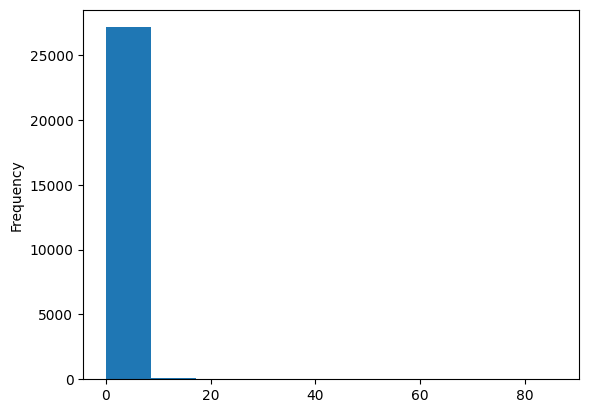

In [ ]:
col_metrics(ntsb_4, 'inj_tot_t') 

In [ ]:
# Column 69: Wind_vel_ind

# Drop the two rows that have nulls for column 69 - wind_vel_ind
ntsb_4 = ntsb_4.dropna(subset=['wind_vel_ind'])

#Change data type to string
ntsb_4['wind_vel_ind'] = ntsb_4['wind_vel_ind'].astype('string')

<ipython-input-186-ed95feb0f7e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ntsb_4['wind_vel_ind'] = ntsb_4['wind_vel_ind'].astype('string')


In [ ]:
# column 71: gust_kts   

print(ntsb_4.sort_values('gust_kts'))

      wind_vel_ind gust_ind  gust_kts  altimeter  wx_dens_alt wx_int_precip  \
0              UNK        U       0.0        NaN          NaN           UNK   
38811         CALM        N       0.0        NaN          NaN           UNK   
38812          UNK        N       0.0  29.000000          NaN           UNK   
38813          UNK        U       0.0  30.000000       7300.0           UNK   
38814         CALM        N       0.0        NaN          NaN           UNK   
...            ...      ...       ...        ...          ...           ...   
58194         SPEC        N       NaN  30.200001          NaN           NaN   
58196         SPEC        N       NaN  30.290001          NaN           NaN   
58197         SPEC        N       NaN  30.219999          NaN           NaN   
58204         SPEC        N       NaN  30.290001          NaN           NaN   
58214         SPEC        N       NaN  29.870001          NaN           NaN   

      ev_highest_injury  inj_tot_t wx_cond_basic Ca

In [ ]:
# column 74: wx_int_precip     

# May have to drop this column since only about 18% of values or 101004 out of 104... are not null or unknown
ntsb_4['wx_int_precip'] = ntsb_4['wx_int_precip'].fillna("UNK")
print(ntsb_4['wx_int_precip'].isna().sum())

print('updated null count:', ntsb_4['wx_int_precip'].isna().sum())

0
updated null count: 0


In [ ]:
# column 77: wx_cond_basic

# Replace 'Unk' with 'UNK' to match the values in wx_cond_basic columns   
ntsb_4['wx_cond_basic'] = ntsb_4['wx_cond_basic'].str.replace('Unk', 'UNK')
# Drop the remaining nulls
ntsb_4 = ntsb_4.dropna(subset=['wx_cond_basic'])

In [ ]:
# convert data types to string
ntsb_4['gust_ind'] = ntsb_4['gust_ind'].astype('string')
ntsb_4['wx_int_precip'] = ntsb_4['wx_int_precip'].astype('string')
ntsb_4['ev_highest_injury'] = ntsb_4['ev_highest_injury'].astype('string')
ntsb_4['wx_cond_basic'] = ntsb_4['wx_cond_basic'].astype('string')
ntsb_4['Cause_Factor'] = ntsb_4['Cause_Factor'].astype('string')
ntsb_4['crew_category'] = ntsb_4['crew_category'].astype('string')
ntsb_4['crew_sex'] = ntsb_4['crew_sex'].astype('string')
ntsb_4['med_certf'] = ntsb_4['med_certf'].astype('string')
ntsb_4['pilot_flying'] = ntsb_4['pilot_flying'].astype('string')
ntsb_4['crew_inj_level'] = ntsb_4['crew_inj_level'].astype('string')

In [ ]:
# Drop unnecessary columns
ntsb_4 = ntsb_4.drop('Cause_Factor', axis=1)

In [ ]:
ntsb_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66861 entries, 0 to 112802
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wind_vel_ind       66861 non-null  string 
 1   gust_ind           66837 non-null  string 
 2   gust_kts           58949 non-null  float64
 3   altimeter          51941 non-null  float64
 4   wx_dens_alt        18573 non-null  float64
 5   wx_int_precip      66861 non-null  string 
 6   ev_highest_injury  66843 non-null  string 
 7   inj_tot_t          37593 non-null  float64
 8   wx_cond_basic      66861 non-null  string 
 9   crew_no            11749 non-null  float64
 10  crew_category      11664 non-null  string 
 11  crew_age           11323 non-null  float64
 12  crew_sex           8733 non-null   string 
 13  med_certf          11271 non-null  string 
 14  pilot_flying       65504 non-null  string 
 15  crew_inj_level     11374 non-null  string 
dtypes: float64(6), string

## Save final copy of data set

In [ ]:
ntsb_4.to_csv('cleaned_ntsb.csv')